# Neuronale Netze

<img src="img/ag/Figure-01-021.png" style="float: center; width: 30%; margin-left: auto; margin-right: auto;"/>

## Neuronen

<img src="img/ag/Figure-10-001.png" style="width: 80%; margin-left: auto; margin-right: auto;"/>

## Künstliche Neuronen

<img src="img/ag/Figure-10-006.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

## Künstliche Neuronen

<img src="img/ag/Figure-10-004.png" style="width: 30%; margin-left: auto; margin-right: auto;"/>

## Aktivierungsfunktionen

In [10]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
act_x = torch.linspace(-6, 6, 100)

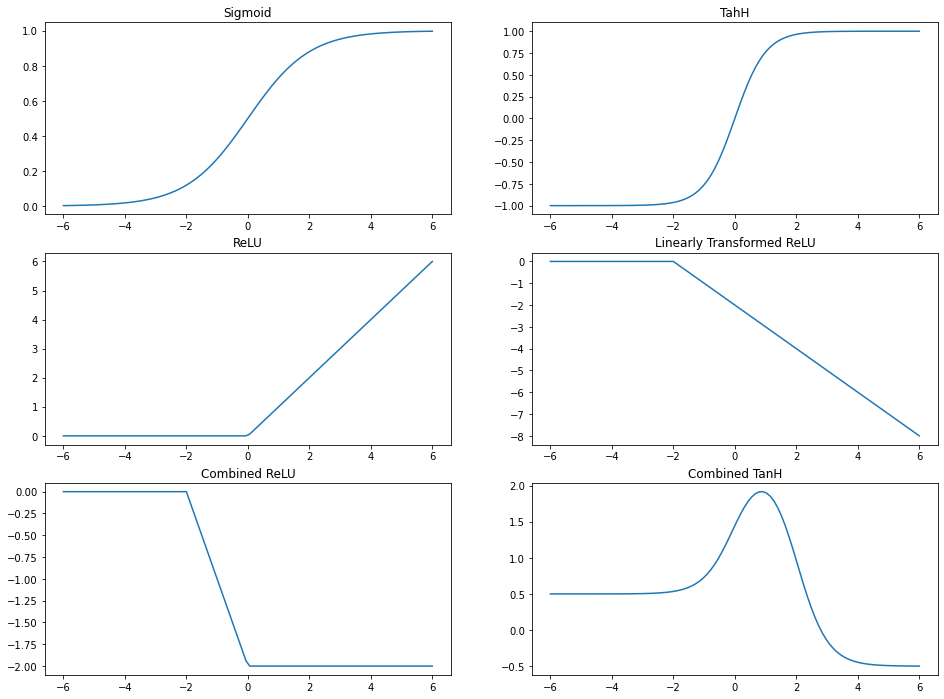

In [11]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 1)
plt.title("Sigmoid")
plt.plot(act_x, nn.Sigmoid()(act_x))
plt.subplot(3, 2, 2)
plt.title("TahH")
plt.plot(act_x, nn.Tanh()(act_x))
plt.subplot(3, 2, 3)
plt.title("ReLU")
plt.plot(act_x, nn.ReLU()(act_x))
plt.subplot(3, 2, 4)
plt.title("Linearly Transformed ReLU")
plt.plot(act_x, - nn.ReLU()(act_x + 2))
plt.subplot(3, 2, 5)
plt.title("Combined ReLU")
plt.plot(act_x, nn.ReLU()(act_x) - nn.ReLU()(act_x + 2))
plt.subplot(3, 2, 6)
plt.title("Combined TanH")
plt.plot(act_x, nn.Tanh()(act_x) - 1.5 * nn.Tanh()(act_x - 2));

In [12]:
import torch
import torch.nn as nn

In [13]:
torch.manual_seed(2022)
neuron = lambda x: nn.Tanh()(nn.Linear(4, 1)(x))

In [14]:
neuron(torch.tensor([1.0, 2.0, 3.0, 4.0]))

tensor([0.5131], grad_fn=<TanhBackward0>)

In [15]:
torch.manual_seed(2022)
neuron = nn.Sequential(
    nn.Linear(4, 1),
    nn.Tanh()
)

In [16]:
neuron(torch.tensor([1.0, 2.0, 3.0, 4.0]))

tensor([0.5131], grad_fn=<TanhBackward0>)

## Neuronale Netze

<img src="img/ag/Figure-18-032.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

In [17]:
seq_model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 2)
)

In [18]:
seq_model(torch.tensor([1.0, 2.0]))

tensor([0.2701, 0.1480], grad_fn=<AddBackward0>)

## Erinnerung: Training

<br/>
<img src="img/ag/Figure-01-008.png" style="width: 100%;"/>

## Training Neuraler Netze

<img src="img/ag/Figure-18-033.png" style="width: 100%; margin-left: auto; margin-right: auto;"/>


## Training Neuraler Netze

<img src="img/ag/Figure-18-034.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## Training Neuraler Netze

<img src="img/ag/Figure-18-035.png" style="width: 100%; margin-left: auto; margin-right: auto; 0"/>

## Training Neuraler Netze

<img src="img/ag/Figure-18-036.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

## Training Neuraler Netze

<img src="img/ag/Figure-18-037.png" style="width: 100%; margin-left: auto; margin-right: auto; 0"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-001.png" style="float: left; width: 45%; margin-left: auto; margin-right: auto; 0"/>
<img src="img/ag/Figure-05-005.png" style="float: right; width: 45%; margin-left: auto; margin-right: auto; 0"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-012.png" style="width: 35%; margin-left: auto; margin-right: auto; 0"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-013.png" style="width: 60%; margin-left: auto; margin-right: auto; 0"/>

# MNIST

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

input_size = 28 * 28
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.005

In [20]:
mnist_transforms = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor()
])

In [21]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=mnist_transforms,
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=mnist_transforms,
                                          download=True)

Batch shape: torch.Size([1, 28, 28]), label: 5


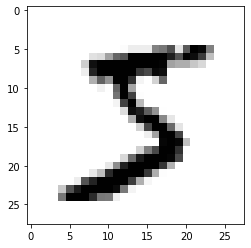

In [22]:
it = iter(train_dataset)
tensor, label = next(it)
print(f"Batch shape: {tensor.shape}, label: {label}")
plt.imshow(tensor[0], cmap="binary")

Batch shape: torch.Size([1, 28, 28]), label: 0


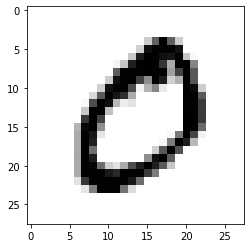

In [23]:
tensor, label = next(it)
print(f"Batch shape: {tensor.shape}, label: {label}")
plt.imshow(tensor[0], cmap="binary")

In [24]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [25]:
def create_model(hidden_size):
    model = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, num_classes)
    )
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [26]:
loss_fn = nn.CrossEntropyLoss()

In [85]:
def training_loop(n_epochs, optimizer, model, loss_fn, device, train_loader, print_progress=True):
    all_losses = []
    for epoch in range(1, n_epochs + 1):
        accumulated_loss = 0
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)

            output = model(images)
            loss = loss_fn(output, labels)
            with torch.no_grad():
                accumulated_loss += loss
                all_losses.append(loss.detach())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
            if (i + 1) % 100 == 0:
                if print_progress:
                    print(f"Epoch {epoch:2}/{n_epochs:2}, step {i + 1}: "
                        f"training loss = {accumulated_loss.item():8.3f}")
                accumulated_loss = 0
    return all_losses

In [92]:
def run_training_loop(hidden_size, num_epochs=num_epochs, print_progress=True):
    model, optimizer = create_model(hidden_size)
    losses = training_loop(
        n_epochs=num_epochs,
        optimizer=optimizer,
        model=model,
        loss_fn=loss_fn,
        device=torch.device('cpu') if torch.cuda.is_available() else torch.device('cpu'),
        train_loader=train_loader,
        print_progress=print_progress,
    )
    return model, losses

In [93]:
model, losses = run_training_loop(32, num_epochs=5, print_progress=False)

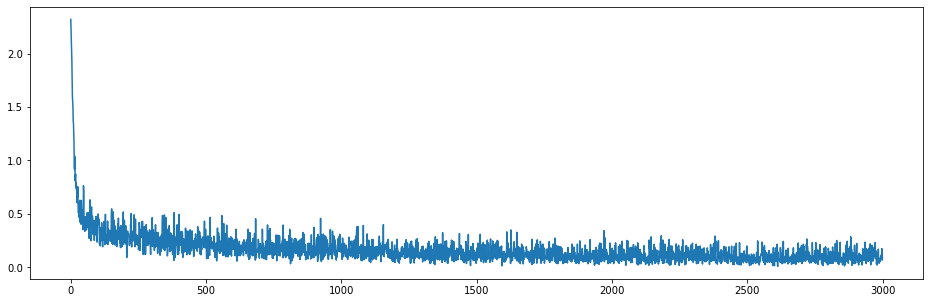

In [94]:
from matplotlib import pyplot
pyplot.figure(figsize=(16, 5))
pyplot.plot(range(len(losses)), losses);

In [95]:
def evaluate_model(model):
	ground_truth = []
	predictions = []
	with torch.no_grad():
		for x, y in test_loader:
			new_predictions = model(x.reshape(-1, input_size))
			predictions.extend(new_predictions.argmax(dim=1).numpy())
			ground_truth.extend(y.numpy())
	return ground_truth, predictions

In [96]:
from sklearn.metrics import classification_report

print(classification_report(*evaluate_model(model)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.97      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.94      0.97      0.96       982
           5       0.97      0.93      0.95       892
           6       0.95      0.97      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.92      0.96      0.94       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



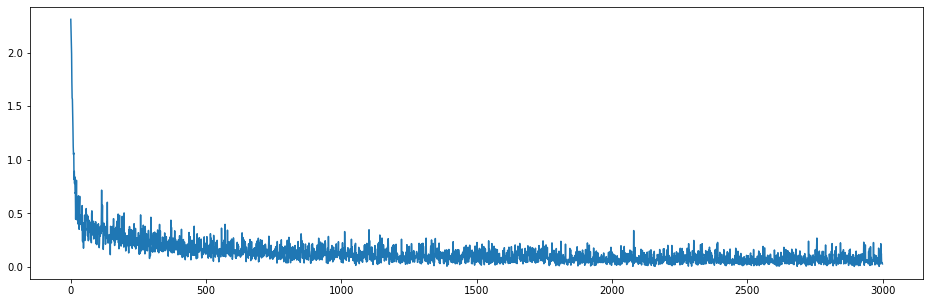

In [97]:
model, losses = run_training_loop(64, print_progress=False)

pyplot.figure(figsize=(16, 5))
pyplot.plot(range(len(losses)), losses);

In [99]:
print(classification_report(*evaluate_model(model)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.94      0.96       892
           6       0.97      0.97      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



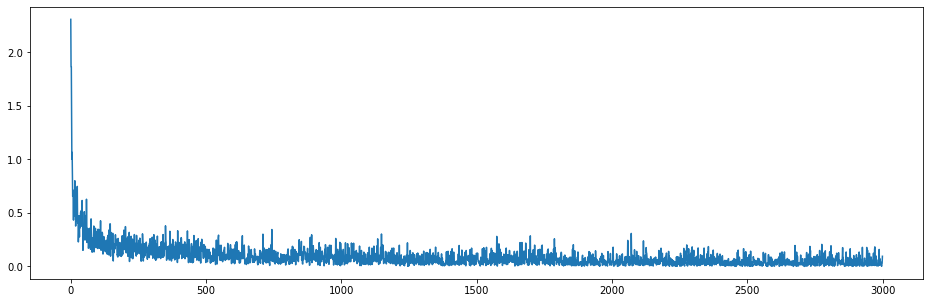

In [102]:
model, losses = run_training_loop(512, print_progress=False)

pyplot.figure(figsize=(16, 5))
pyplot.plot(range(len(losses)), losses);

In [103]:
print(classification_report(*evaluate_model(model)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.97      0.97      0.97       982
           5       1.00      0.95      0.97       892
           6       0.99      0.98      0.99       958
           7       0.99      0.94      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Modelle

<img src="img/ag/Figure-11-001.png" style="width: 100%;"/>

## Für Neuronale Netze:

Was repräsentiert werden kann hängt ab von

- Anzahl der Layers
- Anzahl der Neutronen per Layer
- Komplexität der Verbindungen zwischen Neutronen

### Was kann man (theoretisch) lernen?

Schwierig aber irrelevant

### Was kann man praktisch lernen?

Sehr viel, wenn man genug Zeit und Daten hat

### Was kann man effizient lernen?

Sehr viel, wenn man sich geschickt anstellt
(und ein Problem hat, an dem viele andere Leute arbeiten)

# Bias/Variance Tradeoff

- Modelle mit geringer Expressivität (representational power)
  - Können schnell trainiert werden
  - Arbeiten mit wenig Trainingsdaten
  - Sind robust gegenüber Fehlern in den Trainingsdaten

- Wir sind nicht an einer möglichst exakten Wiedergabe unserer Daten interessiert

- Entscheidend ist wie gut unser Modell auf unbekannte Daten generalisiert

<img src="img/ag/Figure-09-002.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-004.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-003.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-005.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>


### Generalisierung und Rauschen
<img src="img/ag/Figure-09-008.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-009.png" style="width: 80%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-010.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## Komplexität der Entscheidungsgrenze

<img src="img/ag/Figure-09-006.png" style="width: 100%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-001.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

## Datenverteilung und Qualität


### Erinnerung: die Trainings-Schleife

<img src="img/ag/Figure-08-001.png" style="width: 20%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-08-001.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

## Was lernt ein Klassifizierer?

<img src="img/ag/Figure-08-002.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-08-003.png" style="width: 100%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-08-004.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

# Wie gut sind wir?

Wie wissen wir, wie gut unser Modell wirklich ist?

## Was kann schief gehen?

<img src="img/ag/Figure-03-015.png" style="width: 100%; margin-left: auto; margin-right: auto; 0"/>

## Was kann schief gehen?

<img src="img/ag/Figure-03-017.png" style="width: 100%; margin-left: auto; margin-right: auto; 0"/>

## Was kann schief gehen?

<img src="img/ag/Figure-03-018.png" style="width: 80%; margin-left: auto; margin-right: auto; 0"/>

## Accuracy: Wie viel haben wir richtig gemacht?


<img src="img/ag/Figure-03-023.png" style="width: 60%; margin-left: auto; margin-right: auto; 0"/>

## Precision: Wie gut sind unsere positiven Elemente?


<img src="img/ag/Figure-03-024.png" style="width: 60%; margin-left: auto; margin-right: auto; 0"/>

## Recall: Wie viele positive Elemente haben wir übersehen?


<img src="img/ag/Figure-03-026.png" style="width: 60%; margin-left: auto; margin-right: auto; 0"/>

## Probleme: Abhängigkeiten

Relevante Informationen sind nicht immer nahe in den Daten:

"Er hatte mit dem Mann, der ihm den Schlüssel, der zum Schloss, das ihn von großem Reichtum trennte, gehörte, gab, noch nicht gesprochen.

# Memory / State
<img src="img/ag/Figure-22-012.png" style="width: 20%; margin-left: auto; margin-right: auto;"/>

Funktioniert gut aber mit gewissen Schwächen.

Man muss wissen, welche Information für das aktuell betrachtete Element relevant ist:

- The cat didn't cross the street because *it* was too wide.
- The cat didn't cross the street because *it* was too tired.
- The cat didn't cross the street because *it* was too wet.
- The cat didn't cross the street because *it* was raining.

# The Bitter Lesson (Rich Sutton)

[T]he only thing that matters in the long run is the leveraging of computation.

Corollary: And data. Lots of data.